<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-source-code-of-the-project" data-toc-modified-id="Import-the-source-code-of-the-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the source code of the project</a></span></li><li><span><a href="#Import-and-use-the-functionality" data-toc-modified-id="Import-and-use-the-functionality-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and use the functionality</a></span></li></ul></div>

# Development with the notebook
This notebook server can be used as a scratchpad. Work in progress code, algorithms, visualizations, tests, ...

The ultimate goal here is to refactor these snippets in well documented and tested python classes and methods so they can be imported easily. 

The suggested workflow is as follows:
1. Use the notebook to prototype and test drive your development
2. Migrate your developed code into the project. Create a python file, organize it in classes,...
3. Document your migrated code (docstring) so it's functionality is documented in the sphinx docs.
4. Import the migrated code back into this notebook and develop tests around it.
5. Include these tests in the project.
6. Cleanup your notebook as the functionality is now in the python project and can be easily imported in the future.


## Import the source code of the project
Updates to the project's source need to be reflected here so it's possible to add new functionality and fix bugs which are directly reflected here. Jupyter supports this behaviour with the `autoreload` magic. 

The 2 cells below will setup this autoreload functionality (so the original import is not cached) and add the project path to the system path. Now the project source can be imported (without installing it as a python package).

In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline

In [2]:
import datetime as dt
import os
import platform
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

PROJECT_PATH = os.path.dirname(os.getcwd())
print(f'PROJECT_PATH = {PROJECT_PATH}')

if not PROJECT_PATH in sys.path:
    sys.path.append(PROJECT_PATH)
    
print('Platform:', platform.platform())
print('Python version:', sys.version)
print('numpy version:', np.__version__)
np.set_printoptions(threshold=sys.maxsize)

PROJECT_PATH = /home/pietro.dantuono@24SEA.local/Projects/MAXWind/py_fatigue
Platform: Linux-6.8.0-52-generic-x86_64-with-glibc2.2.5
Python version: 3.8.15 (default, Nov  6 2022, 02:12:40) 
[Clang 14.0.3 ]
numpy version: 1.23.5


In [3]:
#matplotlib tweaking
plt.rcParams['figure.figsize'] = (10.5/2.514/0.7, 4.5/2.514/0.7)
plt.rcParams["font.family"] = "Sans"
plt.rcParams["font.size"] = 10
# plt.rcParams["axes.grid"] = True
# plt.rcParams['grid.color'] = "#CCCCCC"
# plt.rcParams['grid.linestyle'] = "-"
# plt.rcParams['grid.color'] = "#DDDDDD"
# plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = True

## Import and use the functionality

In [6]:
# Use the package
import py_fatigue as pf
import py_fatigue.cycle_count.rainflow as rf
import py_fatigue.cycle_count.histogram as ht
from py_fatigue.version import parse_version, __version__
from py_fatigue import SNCurve
v = parse_version(__version__)

In [ ]:
EXOTIC = SNCurve(
    [3, 5, 7], [10.970, 13.617, 16], endurance=2.134e11, curve="exotic"
)
DNV_B1A = SNCurve(
    [4, 5],
    [15.117, 17.146],
    norm="DNVGL-RP-C203",
    environment="Air",
    curve="B1",
)
DNV_B1A_END = SNCurve(
    [4, 5],
    [15.117, 17.146],
    norm="DNVGL-RP-C203",
    environment="Air",
    curve="B1",
    endurance=1e9,
)
DNV_B1A = SNCurve(
    [4, 5],
    [15.117, 17.146],
    norm="DNVGL-RP-C203",
    environment="Air",
    curve="B1",
)
DNV_B1W = SNCurve(
    [4, 5],
    [14.917, 17.146],
    norm="DNVGL-RP-C203",
    environment="Seawater with cathodic protection",
    curve="B1",
)
DNV_B1C = SNCurve(
    slope=3,  # SNCurve can handle multiple slope and
    intercept=12.436,  # intercept types, as long as their sizes
    norm="DNVGL-RP-C203",  # are compatible. The slope and intercept attrs
    environment="Free corrosion",  # will be stored as numpy arrays.
    curve="B1",
)
DNV_C_C = SNCurve(
    [3],
    12.115,
    norm="DNVGL-RP-C203",
    environment="Free corrosion",
    curve="C",
)
DNV_E_C = SNCurve(
    3,
    intercept=[11.533,],
    norm="DNVGL-RP-C203",
    environment="Free corrosion",
    curve="E",
)
DNV_W3C = SNCurve(
    [3],
    intercept=[10.493,],
    norm="DNVGL-RP-C203",
    environment="Free corrosion",
    curve="E",
)

B1
B1
B1
C
E
E


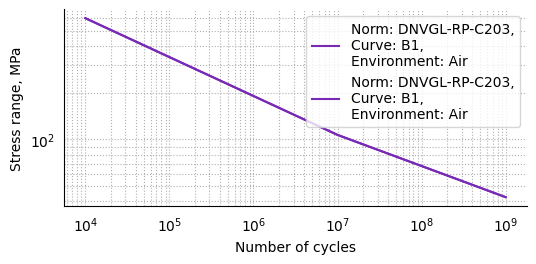

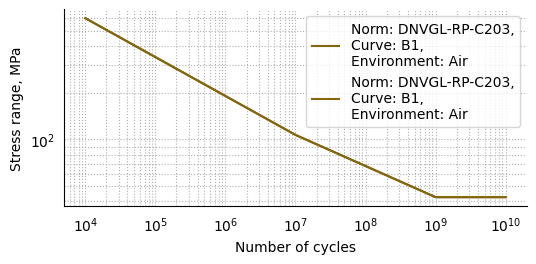

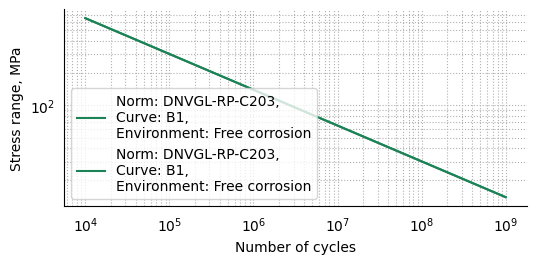

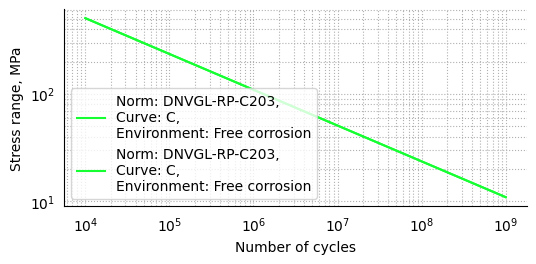

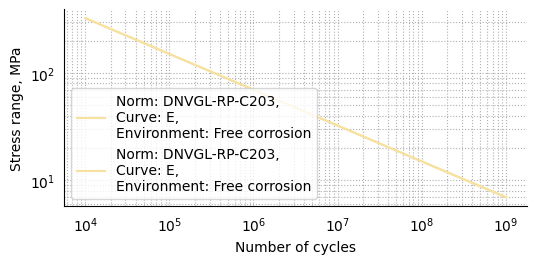

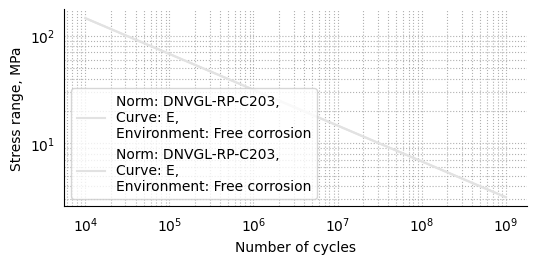

In [ ]:
for sn in  [DNV_B1A, DNV_B1A_END, DNV_B1C, DNV_C_C, DNV_E_C, DNV_W3C]:
        print(sn.curve)
        knees_cycles= sn.get_knee_cycles()
        knees_cycles = np.hstack([knees_cycles, 1E9])
        knees_cycles = np.hstack([1E4, knees_cycles])
        knees_stress = sn.get_knee_stress()
        knees_stress = np.hstack([knees_stress, sn.get_stress(1E9)])
        knees_stress = np.hstack([sn.get_stress(1E4), knees_stress])
        sn_knee = SNCurve.from_knee_points(
            knees_stress,
            knees_cycles,
            sn.endurance,
            sn.environment,
            sn.curve,
            sn.norm,
            sn.unit,
            sn.color,
        )
        fig, ax = sn.plot()
        sn_knee.plot(fig=fig, ax=ax)
        ax.legend()
        sn_knee.id = sn.id
        assert sn == sn_knee

In [41]:
assert np.allclose(sn_knee.slope, sn.slope, rtol=1e-3)
assert np.allclose(sn_knee.intercept, sn.intercept, rtol=1e-3)
assert sn_knee.endurance == sn.endurance
assert sn_knee.environment == sn.environment
assert sn_knee.curve == sn.curve
assert sn_knee.norm == sn.norm
assert sn_knee.unit == sn.unit
assert sn_knee.color == sn.color
assert sn_knee.name == sn.name

In [52]:
if sn.__dict__.keys() != sn_knee.__dict__.keys():
        print(False, "Keys are not the same")
        print(sn.__dict__.keys(), sn_knee.__dict__.keys())
all(
    np.array_equal(sn.__dict__[key], sn_knee.__dict__[key]) for key in sn.__dict__
)

False

In [50]:
[np.array_equal(sn.__dict__[key], sn_knee.__dict__[key]) for key in sn.__dict__]

[True, True, True, True, True, True, False, True, True, True, True]

color #782AB6 #782AB6
types: <class 'str'>, <class 'str'>
color #782AB6
id 4 4
types: <class 'int'>, <class 'int'>
id 4
norm DNVGL-RP-C203 DNVGL-RP-C203
types: <class 'str'>, <class 'str'>
norm DNVGL-RP-C203
environment Air Air
types: <class 'str'>, <class 'str'>
environment Air
curve B1 B1
types: <class 'str'>, <class 'str'>
curve B1
name Norm: DNVGL-RP-C203,
Curve: B1,
Environment: Air Norm: DNVGL-RP-C203,
Curve: B1,
Environment: Air
types: <class 'str'>, <class 'str'>
name Norm: DNVGL-RP-C203,
Curve: B1,
Environment: Air
_AbstractSNCurve__slope [4. 5.] [4. 5.]
types: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
_AbstractSNCurve__slope [4. 5.]
_AbstractSNCurve__intercept [15.117 17.146] [15.117 17.146]
types: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
_AbstractSNCurve__intercept [15.117 17.146]
_AbstractSNCurve__linear False False
types: <class 'bool'>, <class 'bool'>
_AbstractSNCurve__linear False
_AbstractSNCurve__endurance inf inf
types: <class 'float'>, <class 'float'>


In [16]:
slope = [2.88, 5.1, 8.16, 5.1, 2.88]
intercept = [1E-16, 1E-20, 1E-27, 1E-19, 1E-13]
threshold = 20
critical = 2000
pc = pf.ParisCurve(slope=slope, intercept=intercept, threshold=threshold, critical=critical)

assert not pc.linear
assert np.array_equal(pc.slope, slope)
assert np.array_equal(pc.intercept, intercept)
assert pc.threshold == threshold
assert pc.critical == critical
assert pc.get_growth_rate(threshold) == pc.threshold_growth_rate
assert pc.get_growth_rate(critical) == pc.critical_growth_rate
knee_gr = pc.get_knee_growth_rate()
knee_sif = pc.get_knee_sif()
assert len(knee_gr) == len(knee_sif)
assert np.all(knee_gr >= 0)
assert np.all(knee_sif >= threshold)
assert np.all(knee_sif <= critical)
assert np.allclose(knee_gr, pc.get_growth_rate(knee_sif), rtol=1e-2)
assert np.allclose(knee_sif, pc.get_sif(knee_gr), rtol=1e-2)


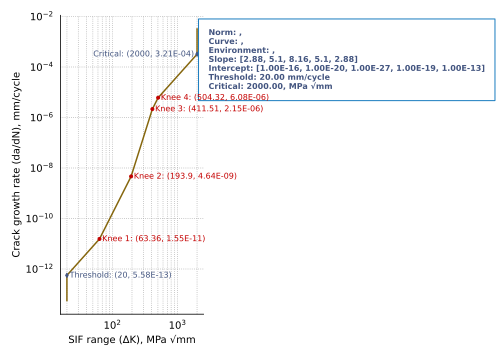

In [15]:
pc

In [17]:
print(knee_gr)
print(pc.get_sif(knee_gr))

[1.54592774e-11 4.64158883e-09 2.15443469e-06 6.07832313e-06]
[ 63.35804993 193.9017369  411.50876026 504.31594872]


In [6]:
knee_sif

array([ 63.35804993, 193.9017369 , 411.50876026, 504.31594872])